### Load packages

In [1]:
library(tidyverse)
library(ggplot2)
library(RColorBrewer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.2     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Import Counts

In [2]:
cntfile <- '/home/jovyan/work/scratch/analysis_output/out/hts-pilot-2019.RData'
attach(cntfile)
tools::md5sum(cntfile)

### Check Dimension of map results
dim(mapresults)

/home/jovyan/work/scratch/analysis_output/out/hts-pilot-2019.RData 
                                "f617195665ef950ffb36a89f2d18a9ca"

[1] 144  10

### filter out 2018 samples from mapresults

In [3]:
mapresults %>% filter(str_detect(expid, "2019")) -> mapresults2019
dim(mapresults2019)

[1] 96 10

### Import metadata file

In [4]:
metadtfile <- '/data/hts_2019_data/hts2019_pilot_rawdata/2019_pilot_metadata.tsv'
tools::md5sum(metadtfile)
mtdf<-readr::read_tsv(metadtfile)
dim(mtdf)

/data/hts_2019_data/hts2019_pilot_rawdata/2019_pilot_metadata.tsv 
                               "757e63c2306c3c68a70b81dfcdbf7f22"

Parsed with column specification:
cols(
  .default = col_character(),
  sample_year = col_double(),
  enrich_rep = col_double(),
  RNA_sample_num = col_double(),
  library_num = col_double(),
  bio_replicate = col_double(),
  Nanodrop_260_280 = col_double(),
  Nanodrop_260_230 = col_double(),
  Nanodrop_concentration_ng_ul = col_double(),
  Bioanalyzer_concentration_ng_ul = col_double(),
  RIN_lowered_threshold = col_double()
)
See spec(...) for full column specifications.


[1] 36 22

### filter out 2018 samples from metadata

In [5]:

mtdf %>% filter(str_detect(Label, "2019")) -> mtdf2019
dim(mtdf2019)

[1] 24 22

### Add a label column to the mapresults object so that it can be merged with the metadata

In [6]:
myregex <- "_S[1-9][0-9]{0,2}_L00[1-4]_ReadsPerGene.out.tab"
mapresults2019 %>% mutate(Label=str_replace(expid,myregex,"")) -> mapresults2019

### Check for symmetric differences (to ensure that all labels are accounted for)

In [7]:
setdiff(mapresults2019$Label, mtdf2019$Label)
setdiff(mtdf2019$Label, mapresults2019$Label)

character(0)

character(0)

### Merge the mapping results with the metadata

In [8]:
mapresults2019 %>% full_join(mtdf2019) -> annomapres
dim(annomapres)
annomapres %>% colnames
annomapres %>% head

Joining, by = "Label"


[1] 96 32

[1] "expid"                           "ngenemap"                       
 [3] "namb"                            "nmulti"                         
 [5] "nnofeat"                         "nunmap"                         
 [7] "depth"                           "prob.gene"                      
 [9] "prob.nofeat"                     "prob.unique"                    
[11] "Label"                           "sample_year"                    
[13] "group"                           "enrich_rep"                     
[15] "RNA_sample_num"                  "genotype"                       
[17] "condition"                       "libprep_person"                 
[19] "enrichment_method"               "enrichment_short"               
[21] "i7_index"                        "i5_index"                       
[23] "i5_primer"                       "i7_primer"                      
[25] "library_num"                     "bio_replicate"                  
[27] "Nanodrop_260_280"                "Nanodrop_260_230"               
[29] "Nanodrop_concentration_ng_ul"    "Bioanalyzer_concentration_ng_ul"
[31] "RIN_normal_threshold"            "RIN_lowered_threshold"

expid,ngenemap,namb,nmulti,nnofeat,nunmap,depth,prob.gene,prob.nofeat,prob.unique,⋯,i5_primer,i7_primer,library_num,bio_replicate,Nanodrop_260_280,Nanodrop_260_230,Nanodrop_concentration_ng_ul,Bioanalyzer_concentration_ng_ul,RIN_normal_threshold,RIN_lowered_threshold
<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1_2019_P_M1_S1_L001_ReadsPerGene.out.tab,4660549,606,95540,26923,21162,4804780,0.9699818,0.005603378,0.9755851,⋯,i501,i701,1,1,2.14,1.52,293,197,N/A,9.8
1_2019_P_M1_S1_L002_ReadsPerGene.out.tab,4591006,638,94070,26053,19644,4731411,0.9703249,0.005506391,0.9758313,⋯,i501,i701,1,1,2.14,1.52,293,197,N/A,9.8
1_2019_P_M1_S1_L003_ReadsPerGene.out.tab,4715846,615,97787,27257,19307,4860812,0.9701766,0.005607499,0.9757841,⋯,i501,i701,1,1,2.14,1.52,293,197,N/A,9.8
1_2019_P_M1_S1_L004_ReadsPerGene.out.tab,4681095,607,98723,26775,17356,4824556,0.9702644,0.005549733,0.9758141,⋯,i501,i701,1,1,2.14,1.52,293,197,N/A,9.8
10_2019_P_M1_S10_L001_ReadsPerGene.out.tab,3261459,464,75280,26470,6456,3370129,0.9677549,0.007854299,0.9756092,⋯,i502,i702,10,4,2.16,1.25,262,168,10,10.0
10_2019_P_M1_S10_L002_ReadsPerGene.out.tab,3208423,445,73190,25919,6097,3314074,0.9681205,0.007820888,0.9759414,⋯,i502,i702,10,4,2.16,1.25,262,168,10,10.0


### Figures for mapping results

In [9]:
mygeom <-  geom_point(position = position_jitter(w = 0.3, h = 0))
mypal <- scale_colour_manual(name="",  values =brewer.pal(3,"Set1"))
mytheme <-  theme(axis.text.x = element_text(angle = 90, hjust = 1)) + theme_bw()
myfacet <- facet_grid(genotype~ condition, drop=TRUE, scales="free_x", space="free")

### Visualize proportion of uniquely mapped reads

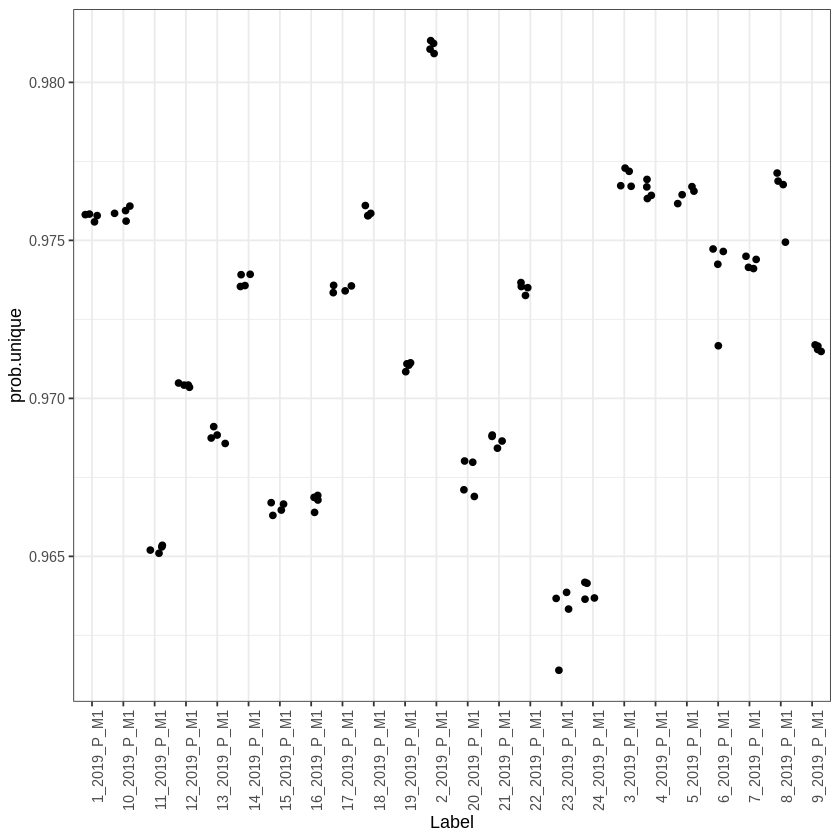

In [10]:
ggplot(annomapres, aes(x=Label, y=prob.unique)) + mygeom + mytheme

### Visualize proportion of uniquely mapped reads with some annotation

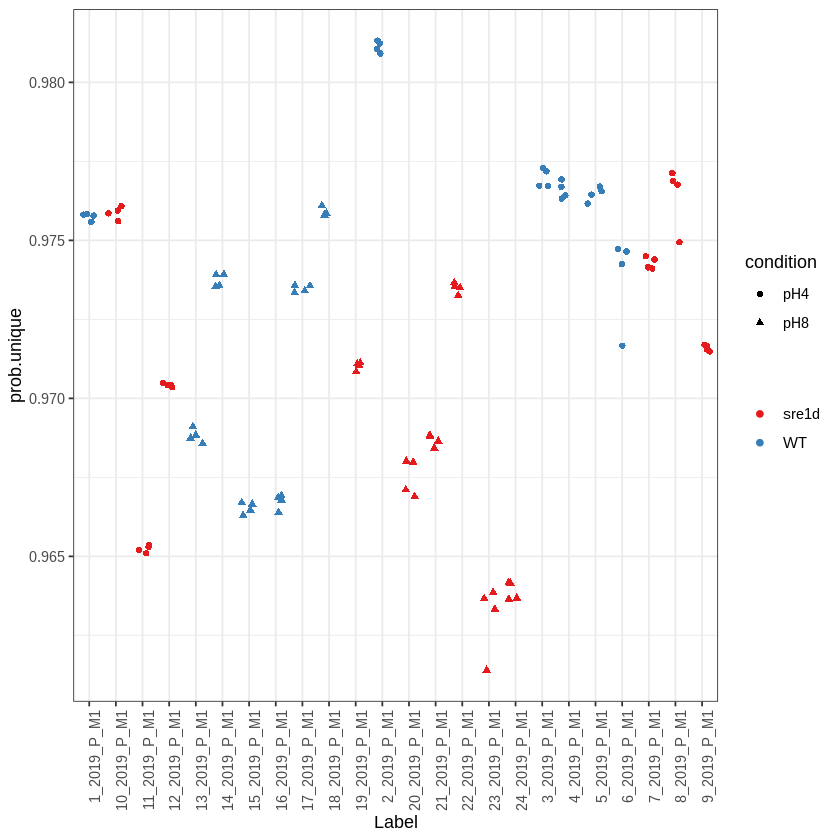

In [11]:
ggplot(annomapres, aes(x=Label, y=prob.unique, shape=condition, color=genotype))+
    mygeom+mytheme+mypal

### Visualize proportion of uniquely mapped reads with facets

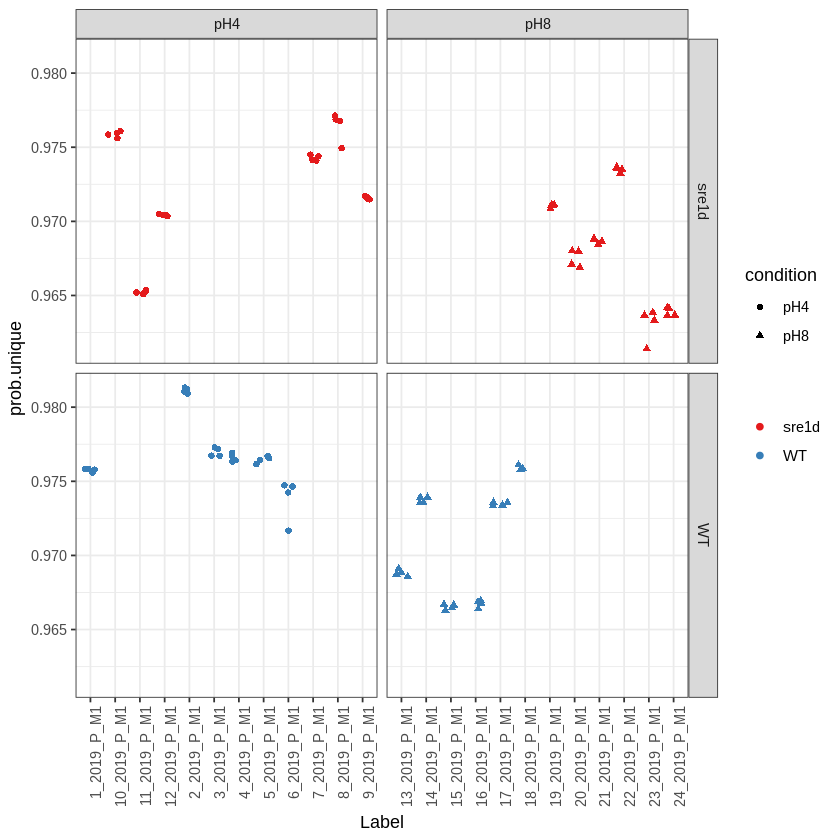

In [12]:
ggplot(annomapres, aes(x=Label, y=prob.unique, shape=condition, color=genotype))+
    mygeom+mytheme+mypal+myfacet

### Visualize depth across libraries showing the lane variability

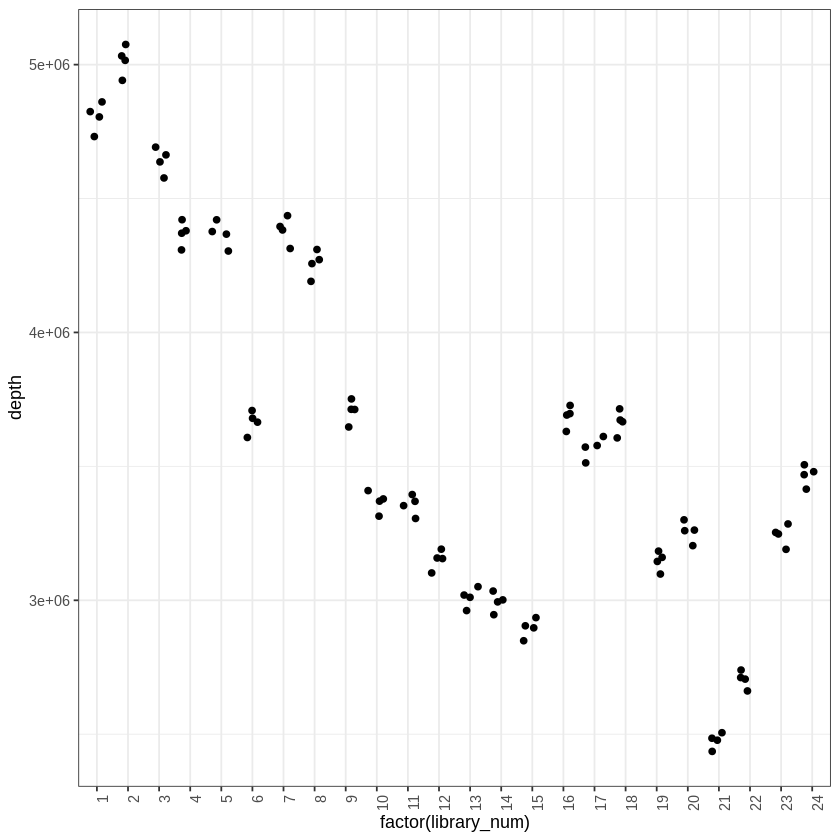

In [13]:
ggplot(annomapres, aes(x= factor(library_num), y= depth))+
    mygeom+mytheme+mypal

### Average the proportions and depth

In [14]:
sumvars <- vars(prob.gene,prob.nofeat,prob.unique,depth)
grpvars <- vars(library_num, genotype, condition)


annomapres %>%
  group_by_at(grpvars) %>%
  summarize_at(sumvars,mean) -> annomapres0

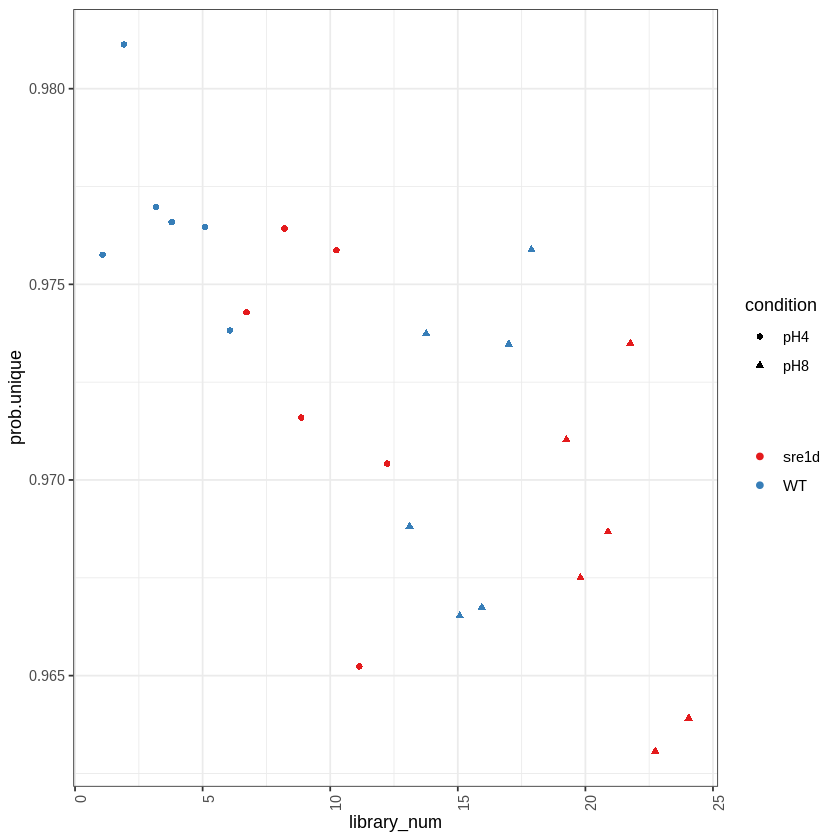

In [15]:
ggplot(annomapres0, aes(x=library_num, y=prob.unique, shape=condition, color=genotype))+
    mygeom+mytheme+mypal

### Visualize average depth across libaries

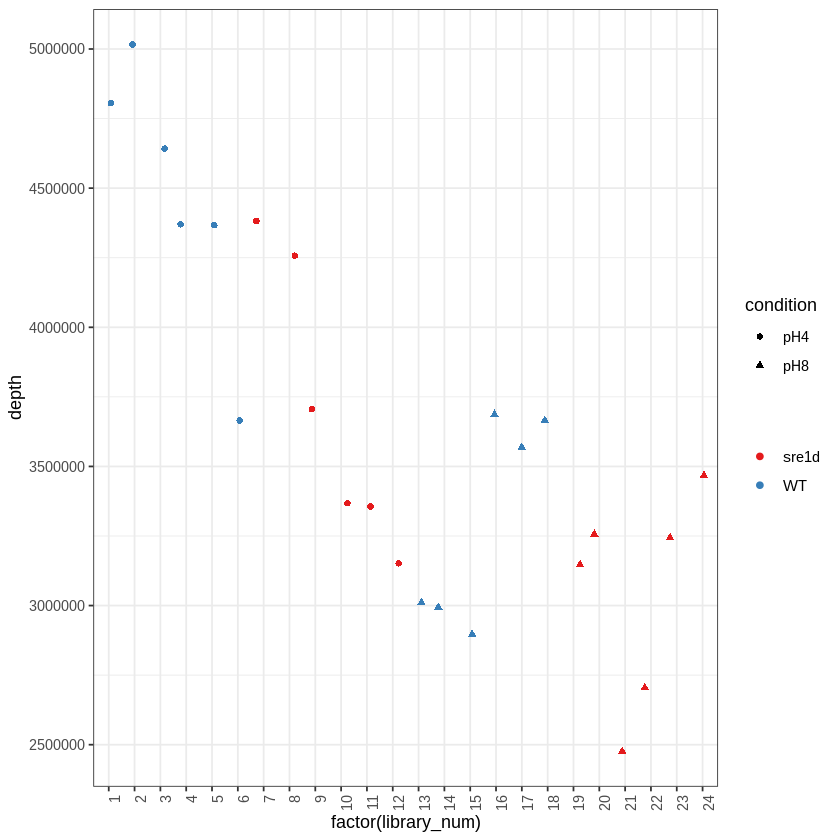

In [16]:
ggplot(annomapres0, aes(x=factor(library_num), y=depth, shape=condition, color=genotype))+
    mygeom+mytheme+mypal

In [17]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 9 (stretch)

Matrix products: default
BLAS:   /usr/lib/openblas-base/libblas.so.3
LAPACK: /usr/lib/libopenblasp-r0.2.19.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2 forcats_0.4.0      stringr_1.4.0      dplyr_0.8.1       
 [5] purrr_0.3.2        readr_1.3.1        tidyr_0.8.3        tibble_2.1.2      
 [9] ggplot2_3.1.1      tidyverse_1.2.1   

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-3     tidyselect_0.2.5 r